### Simple linear regression
This notebook presents an example of machine learning using simple linear regression. In simple linear regression, we use data with only one independent variable ($x_1$). The goal is to fit the data to the equation:
$$y = \alpha  + \beta  x$$
Simple linear regression is not very useful in real world data science, but it is much easier to visualize than higher dimensional models. By learning about the simple model, we can gain insight into more complex regression models. Note that simple linear regression scales variables automatically.

### The math
For any point $(x_i, y_i)$ in the dataset, we have $$ y_i = \alpha + \beta x_i + \epsilon_i$$
where $\epsilon_i$ is the residual error (i.e. the distance between the actual data point and the data point that lies on the line given by our proposed model). The goal of a linear regression model (particularly using he Ordinary Least Squares method) is to find values $\hat{\alpha}$ and $\hat{\beta}$ that minimize the sum of squared residuals. In other words, we want to find the following optimization: $$ min \sum_{i=1}^n \hat{\epsilon} ^2 =  \underset{a,b}min \sum_{i=1}^n (y_i - a - b x_i) ^2$$

Upon expansion, partial derivatives, etc, we find: $$ \hat{\alpha} = \bar{y} - \hat{\beta}  \bar{x} $$ and $$ \hat{\beta} = \frac{Cov(x,y)}{Var(x)} = r_{xy} \frac{s_y}{s_x} $$

In this example we will fit a simple linear regression model with target variable $y$ as salary, $x$ as years of work experience. 

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
data = pd.read_csv('Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
target = data['Salary']
features = data['YearsExperience']
target

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [22]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=1/3, random_state=0)
X_train

5      2.9
16     5.1
8      3.2
14     4.5
23     8.2
20     6.8
1      1.3
29    10.5
6      3.0
4      2.2
18     5.9
19     6.0
9      3.7
7      3.2
25     9.0
3      2.0
0      1.1
21     7.1
15     4.9
12     4.0
Name: YearsExperience, dtype: float64

In [23]:
y_train

5      56642.0
16     66029.0
8      64445.0
14     61111.0
23    113812.0
20     91738.0
1      46205.0
29    121872.0
6      60150.0
4      39891.0
18     81363.0
19     93940.0
9      57189.0
7      54445.0
25    105582.0
3      43525.0
0      39343.0
21     98273.0
15     67938.0
12     56957.0
Name: Salary, dtype: float64

In [25]:
# instantiate a linear regression model and fit the data. 1 dimensional feature sets must be reshaped
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# using the model to make predictions on the test set
predictions = lr.predict(X_test.values.reshape(-1,1))
predictions

array([  40835.10590871,  123079.39940819,   65134.55626083,
         63265.36777221,  115602.64545369,  108125.8914992 ,
        116537.23969801,   64199.96201652,   76349.68719258,
        100649.1375447 ])

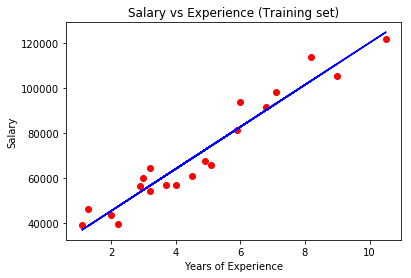

In [35]:
# first visualize the training data and the regression line
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, lr.predict(X_train.values.reshape(-1,1)), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

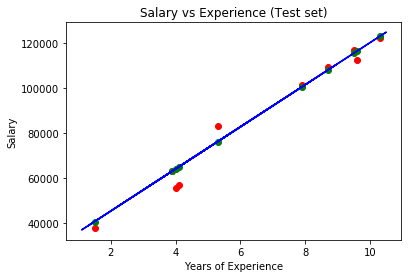

In [40]:
# netx visualize the Test set and predictions
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, predictions, color='green')
plt.plot(X_train, lr.predict(X_train.values.reshape(-1,1)), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')